<a href="https://colab.research.google.com/github/Sachinsatya/data_insights-/blob/main/Copy_of_8th_April_New_Pre_Trained_Models%2C_Ensemble_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import cv2, os

In [ ]:
resnet = tf.keras.applications.ResNet50()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
resnet.input_shape

(None, 224, 224, 3)

In [ ]:
resnet.output_shape

(None, 1000)

In [ ]:
! wget https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg

--2023-04-08 14:46:25--  https://hips.hearstapps.com/hmg-prod/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 229955 (225K) [image/jpeg]
Saving to: ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’

dog-puppy-on-garden 100%[===================>] 224.57K  --.-KB/s    in 0.03s   

2023-04-08 14:46:25 (7.78 MB/s) - ‘dog-puppy-on-garden-royalty-free-image-1586966191.jpg’ saved [229955/229955]



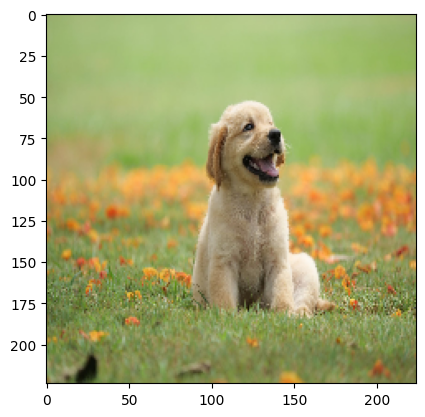

In [ ]:
image = cv2.imread("dog-puppy-on-garden-royalty-free-image-1586966191.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
plt.imshow(image)

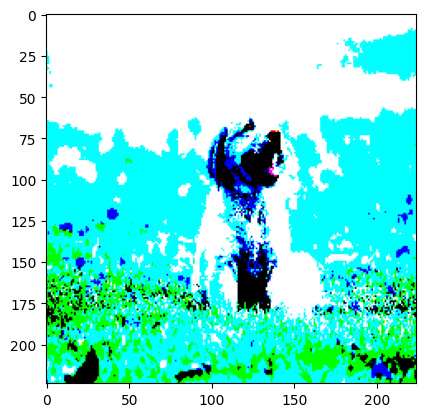

In [ ]:
image = tf.keras.applications.resnet50.preprocess_input(image)
plt.imshow(image)

In [ ]:
image = np.expand_dims(image, axis=0)

In [ ]:
image.shape

(1, 224, 224, 3)

In [ ]:
result = resnet.predict(image) # 1000 prob

1/1 [==============================] - 1s 514ms/step


In [ ]:
np.argmax(result) # 267 index has the highest prob, what class is this ? 

267

In [ ]:
tf.keras.applications.resnet50.decode_predictions(result)

[[('n02113799', 'standard_poodle', 0.72619057),
  ('n02099601', 'golden_retriever', 0.1898389),
  ('n02099712', 'Labrador_retriever', 0.054810483),
  ('n02113712', 'miniature_poodle', 0.0117988875),
  ('n02102318', 'cocker_spaniel', 0.0043434915)]]

In [ ]:
# Inception, Resnet, VGG, EfficientNet
# list of all Pre Trained Models - https://keras.io/api/applications/

In [ ]:
resnet_no_top_layer = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_no_top_layer.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

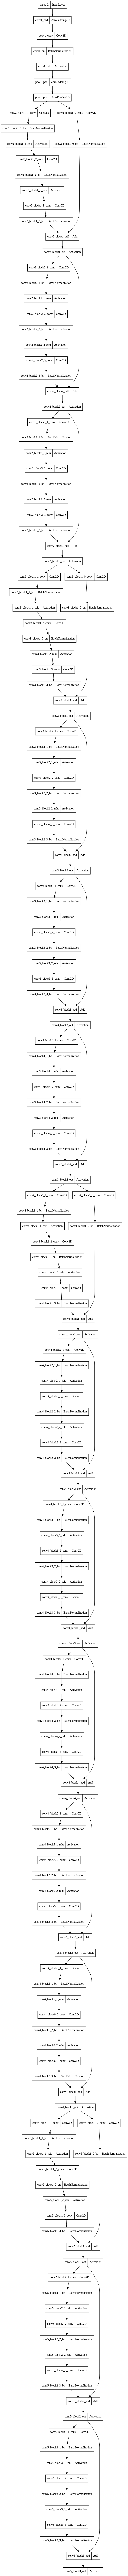

In [ ]:
tf.keras.utils.plot_model(resnet_no_top_layer)

In [ ]:
vgg_no_top_layer = tf.keras.applications.VGG16(include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_no_top_layer.output_shape

(None, 7, 7, 512)

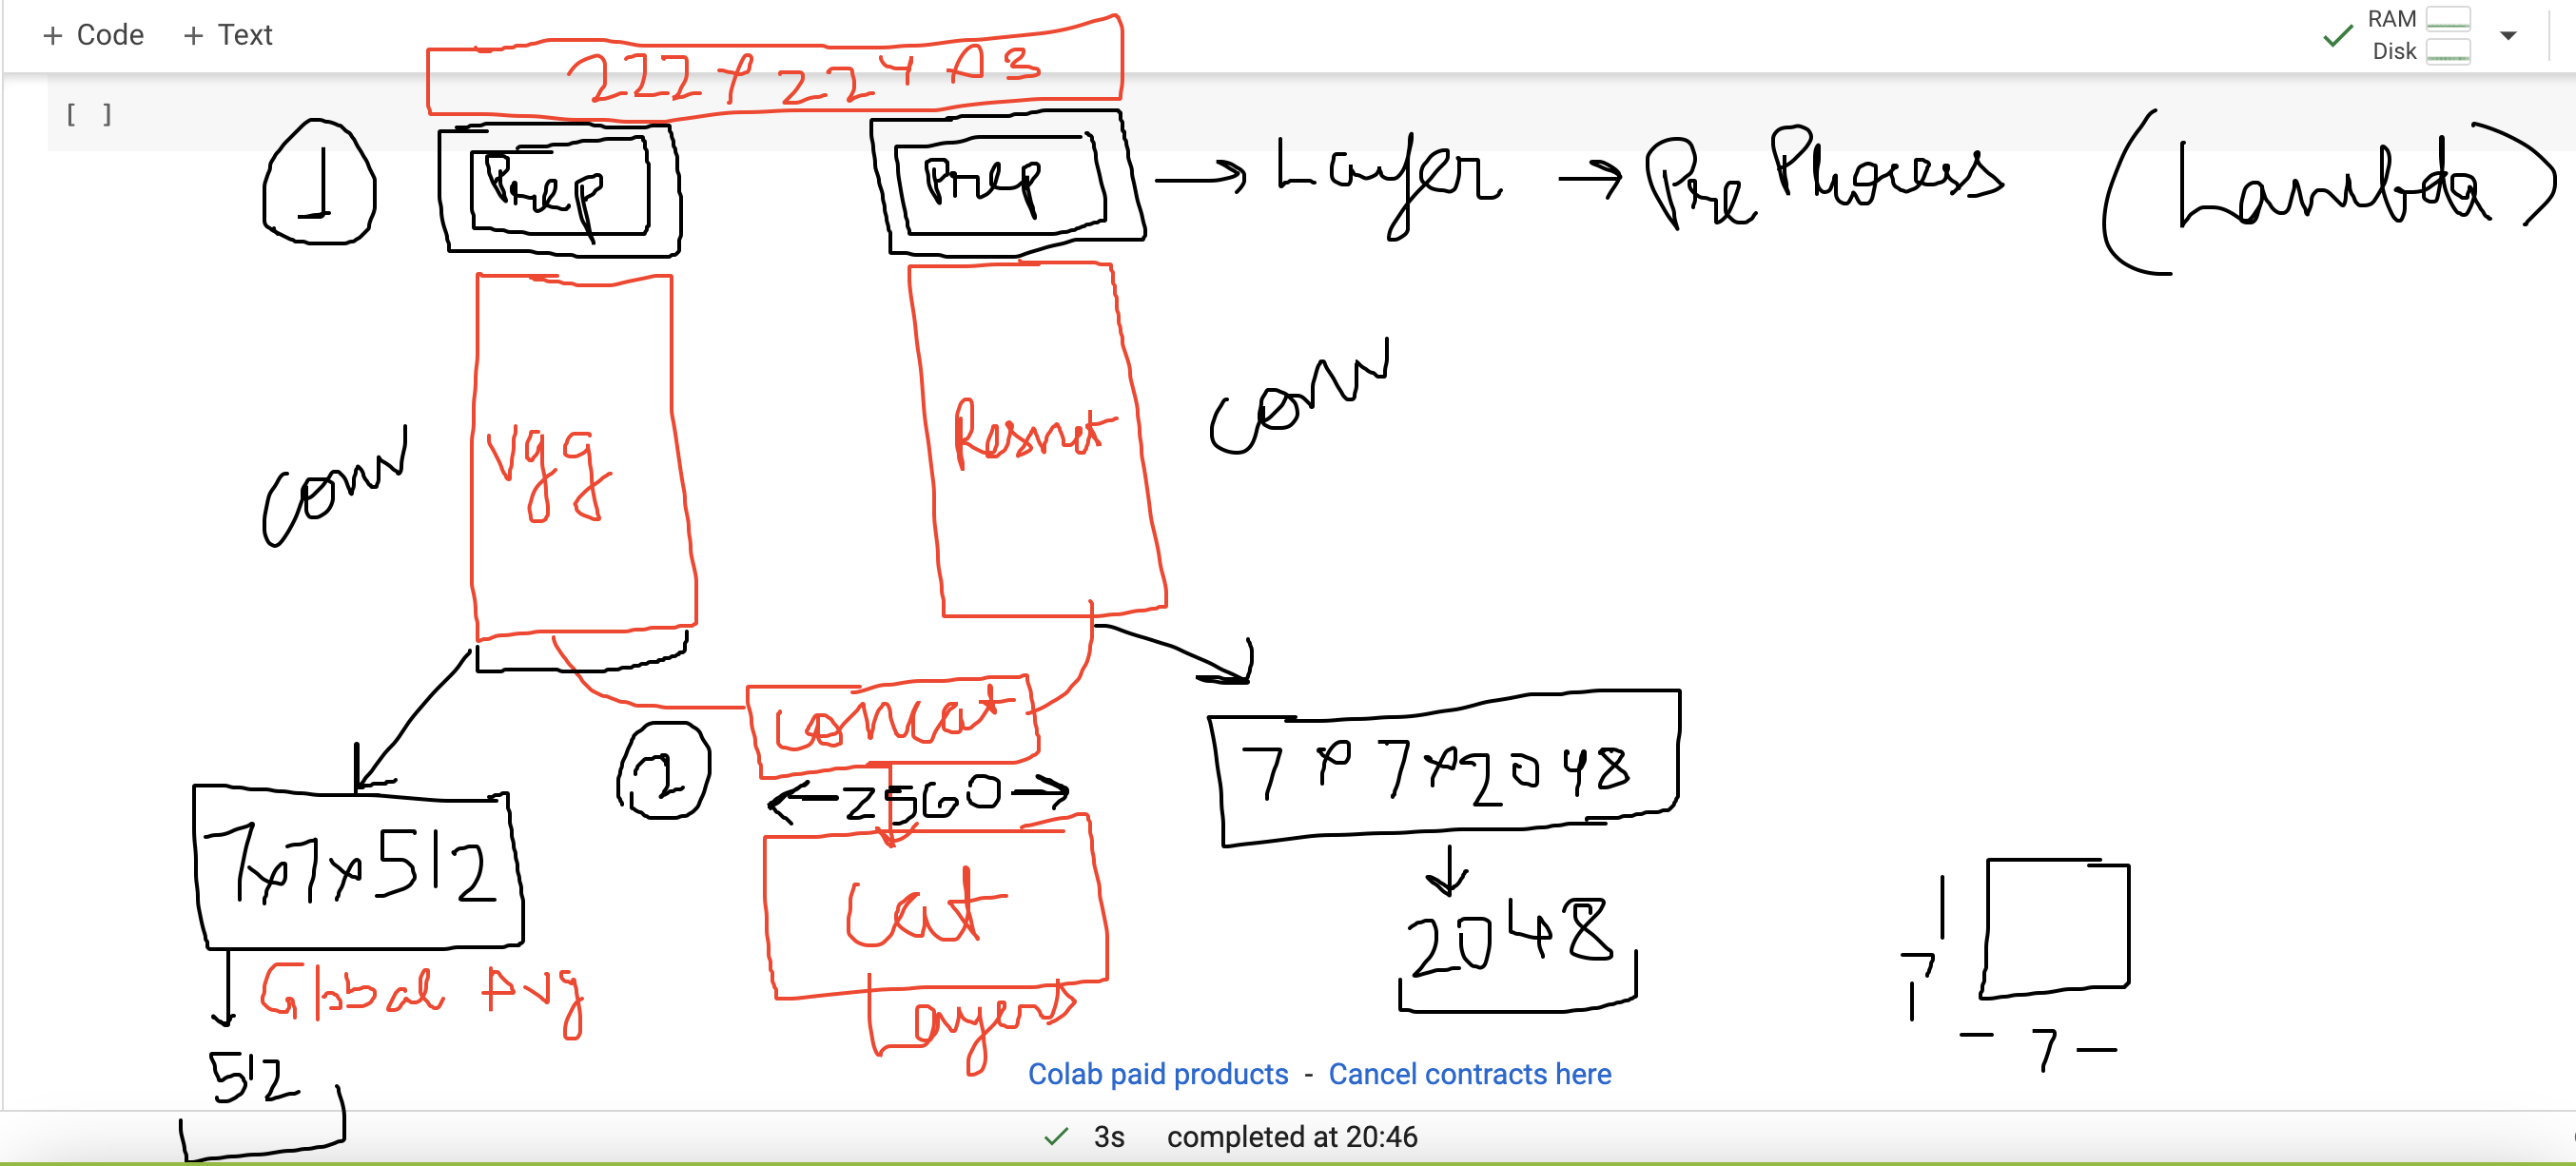

In [ ]:
import kaggle # for the very first time this will fail

OSError: ignored

In [ ]:
# upload kaggle.json
# move to /root/.kaggle

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle # this time it should work!

In [ ]:
! kaggle competitions download -c dog-breed-identification

100% 688M/691M [00:19<00:00, 42.8MB/s]
100% 691M/691M [00:19<00:00, 37.0MB/s]


In [ ]:
! unzip -q dog-breed-identification.zip

In [ ]:
# All images are in train folder
# and we also have a labels.csv imageName --> Label

In [ ]:
label = pd.read_csv("labels.csv")

In [ ]:
label.sample(5)

,id,breed
3430,5549cb4cbda46266c84655109b020331,papillon
9559,efe33a3e4c939748548a052f5f6d83bd,groenendael
8217,cd6faa4e0dac0ac5ec7a17d789b2547d,redbone
8040,c90d5026d84f6f6ff79d8e4e0c503826,welsh_springer_spaniel
6432,a22e9ba8ca7760673290efe27bea6dea,gordon_setter


In [ ]:
label["filename"] = label["id"] + ".jpg"

In [ ]:
label.sample(5)

,id,breed,filename
380,093fc67079701f48bd1d2e52a684ed9e,curly-coated_retriever,093fc67079701f48bd1d2e52a684ed9e.jpg
6738,a8faf31b8ae83769e228f999294b40fc,dingo,a8faf31b8ae83769e228f999294b40fc.jpg
8421,d37b5544840f1aa6a63de67f18043829,tibetan_terrier,d37b5544840f1aa6a63de67f18043829.jpg
2883,4760441bf734319f25dd9cc746f99254,miniature_pinscher,4760441bf734319f25dd9cc746f99254.jpg
9600,f14e83eb54dc159f17ec0a676214a514,gordon_setter,f14e83eb54dc159f17ec0a676214a514.jpg


In [ ]:
batch_size = 64

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.1, rotation_range=0.3, horizontal_flip=True)

In [ ]:
train_idg = idg.flow_from_dataframe(label, directory='train/', x_col='filename', 
                                    y_col='breed', target_size=(224, 224), 
                                    batch_size=batch_size, subset='training')

Found 9200 validated image filenames belonging to 120 classes.


In [ ]:
val_idg = idg.flow_from_dataframe(label, directory='train/', x_col='filename', 
                                  y_col = 'breed', target_size=(224, 224), 
                                  batch_size = batch_size, subset='validation')

Found 1022 validated image filenames belonging to 120 classes.


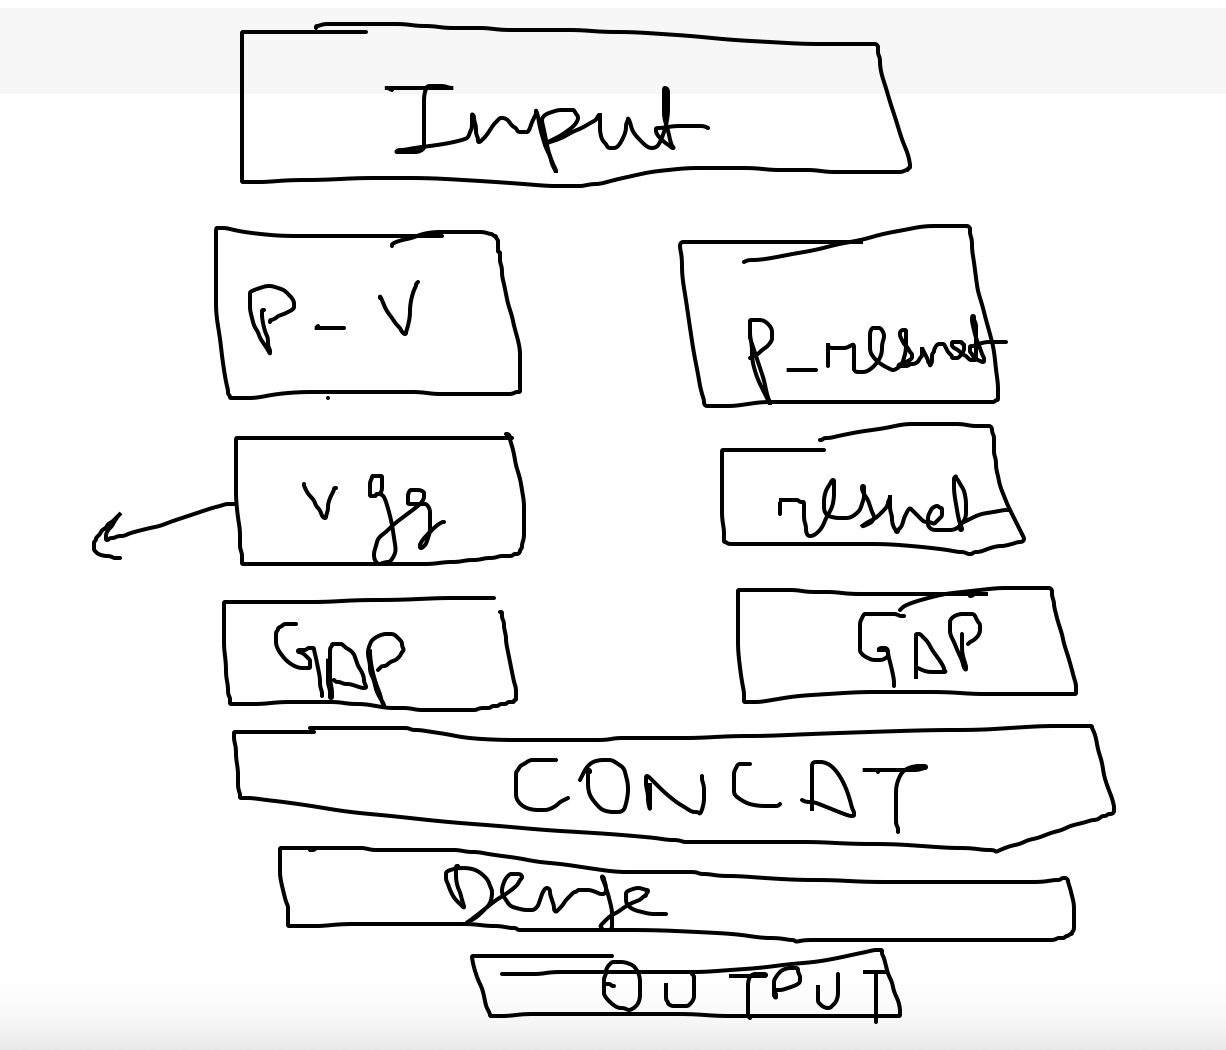

In [ ]:
# How to stop Overfitting? DropOut 

In [ ]:
# Input Layer (1)
input = tf.keras.layers.Input((224, 224, 3), name="InputLayer")


# VGG 
# PreProcessing Layer (2)
vgg_pre_process = tf.keras.layers.Lambda(tf.keras.applications.vgg16.preprocess_input, name="VGGPreProcess") (input)

# Download the model # This is NOT a layer just a download of model 
vgg_model = tf.keras.applications.VGG16(include_top=False, input_shape = (224, 224, 3))
vgg_model.trainable = False # We do not intend to change the VGG weights 

# Vgg layer (3)
vgg = vgg_model (vgg_pre_process)

# Global Avg Pooling (4)
vgg_avg = tf.keras.layers.GlobalAveragePooling2D(name="VGGGlobalAvgPool") (vgg)



#Resnet 
resnet_pre_process = tf.keras.layers.Lambda(tf.keras.applications.resnet50.preprocess_input, name="ResnetPreProcess") (input)

# Download ResNet Model 
resnet_model = tf.keras.applications.ResNet50(include_top=False, input_shape=(224, 224, 3))
resnet_model.trainable = False
resnet = resnet_model (resnet_pre_process)
resnet_avg = tf.keras.layers.GlobalAveragePooling2D(name="ResnetGlobalAvgPool") (resnet)


concat = tf.keras.layers.Concatenate(name="ConcatLayer") ([vgg_avg, resnet_avg])  
dropout = tf.keras.layers.Dropout(0.5, name="Dropout") (concat)
dense = tf.keras.layers.Dense(256, activation='relu', name="Dense") (dropout)
output = tf.keras.layers.Dense(120, activation='softmax', name="Output") (dense)

In [ ]:
# del final_model

In [ ]:
final_model = tf.keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
final_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 InputLayer (InputLayer)        [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 VGGPreProcess (Lambda)         (None, 224, 224, 3)  0           ['InputLayer[0][0]']             
                                                                                                  
 ResnetPreProcess (Lambda)      (None, 224, 224, 3)  0           ['InputLayer[0][0]']             
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['VGGPreProcess[0][0]']    

In [ ]:
# (224, 224, 3) --> 2560

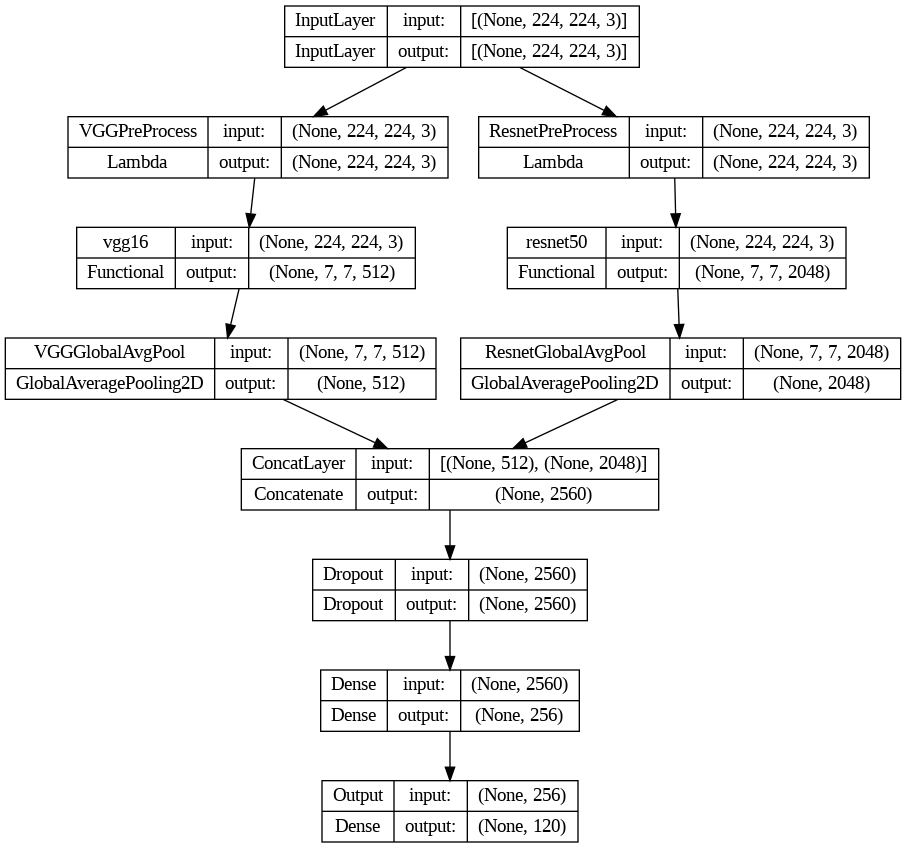

In [ ]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [ ]:
final_model.compile(optimizer=tf.keras.optimizers.SGD(), loss = tf.keras.losses.categorical_crossentropy, 
                    metrics = ["acc"])

In [ ]:
final_model.fit(train_idg, batch_size = batch_size, epochs = 10, validation_data=val_idg)

Epoch 1/10
144/144 [==============================] - 172s 1s/step - loss: 4.8095 - acc: 0.0727 - val_loss: 3.6252 - val_acc: 0.1996
Epoch 2/10
144/144 [==============================] - 156s 1s/step - loss: 3.3626 - acc: 0.2175 - val_loss: 2.3194 - val_acc: 0.4149
Epoch 3/10
144/144 [==============================] - 157s 1s/step - loss: 2.5950 - acc: 0.3365 - val_loss: 1.8094 - val_acc: 0.5127
Epoch 4/10
123/144 [========================>.....] - ETA: 20s - loss: 2.2080 - acc: 0.4098